# Análisis exploratorio General

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [120]:
# Importamos librerías de análisis de datos
dataframe = pd.read_csv('train.csv')#, index_col='id', parse_dates=['fecha'])

In [141]:
#Función para realizar un gráfico de barras horizontales con datos de series

def hbarplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_width()+.3,item.get_y()+.1,str(datos.iloc[index]),fontsize=15)

In [142]:
#Función para realizar un gráfico de barras horizontales con datos de dataframe

def hbarplotdf(datos,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [157]:
#Función para realizar un histograma con datos de series

def hist(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='hist',figsize=tamanio,fontsize=18,color=color,bins=80)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    #plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)
    

In [143]:
# Función para realizar un gráfico de nube de palabras en funión de un diccionario de palabras y frecuencias

def wordcloud(frecuencias,titulo,tamanio=(15,15)):
    wordcloud = WordCloud(width=480, height=480, margin=0,background_color='white').generate_from_frequencies(frequencies=frecuencias)
    plt.figure(figsize=tamanio)
    plt.title(titulo,fontSize=18)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

## Análisis de los atributos de Publicación

### Análisis del atributo titulo

In [144]:
#pongo todo el texto en mayúscula, cuento frecuencia de aparición de cada titulo y transformo la serie obtenida en un diccionario
titulos=dataframe['titulo'].str.upper().value_counts().to_dict()
titulos

{'CASA EN VENTA': 468,
 'DEPARTAMENTO EN VENTA': 289,
 'CASA EN VENTA EN CHIHUAHUA': 268,
 'CASA EN VENTA EN QUERÉTARO': 238,
 'DEPARTAMENTO EN VENTA EN BENITO JUÁREZ': 221,
 'DEPARTAMENTO EN VENTA EN MIGUEL HIDALGO': 177,
 'CASA EN VENTA EN MÉRIDA': 167,
 'CASA EN VENTA ': 132,
 'CASA EN VENTA EN TORREÓN': 119,
 'CASA EN VENTA EN MONTERREY': 115,
 'CASA EN VENTA EN MÉRIDA, YUCATÁN': 115,
 'CASA EN VENTA EN PUEBLA': 112,
 'CASA EN VENTA EN JUÁREZ': 111,
 'CASA EN VENTA EN TEPIC': 107,
 'CASA EN VENTA EN JURIQUILLA': 106,
 'CASA EN VENTA EN SAN ANDRÉS CHOLULA': 105,
 'CASA EN VENTA EN TIJUANA': 104,
 'VENTA DE CASA EN AGUASCALIENTES': 98,
 'TERRENO EN VENTA': 97,
 'DEPARTAMENTO': 89,
 'CASA EN CONDOMINIO EN VENTA EN QUERÉTARO': 86,
 'VENTA DE CASA EN NAUCALPAN': 84,
 'DEPARTAMENTO EN VENTA EN CUAUHTÉMOC': 84,
 'VENTA DE DEPARTAMENTO EN BENITO JUÁREZ': 84,
 'CASA EN VENTA EN CORREGIDORA': 83,
 'DEPARTAMENTO EN VENTA EN INTERLOMAS': 80,
 'CASA EN VENTA, MONTERREY, NUEVO LEÓN': 80,
 'CASA 

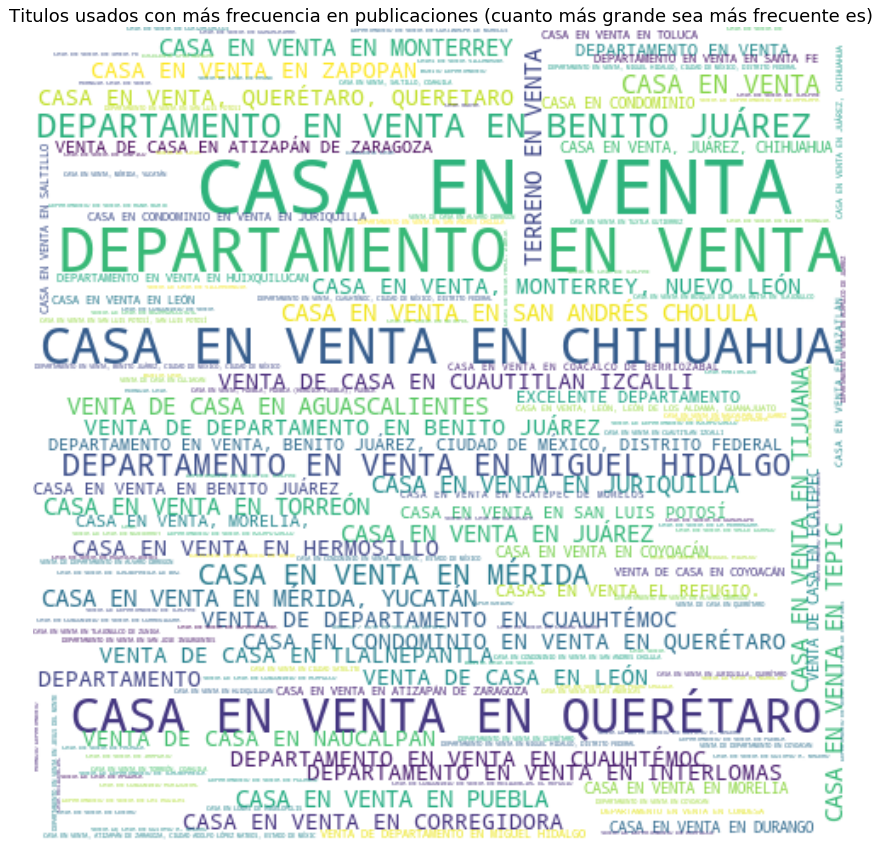

In [145]:
wordcloud(frecuencias=titulos,titulo='Titulos usados con más frecuencia en publicaciones (cuanto más grande sea más frecuente es)')

* Se puede observar que el titulo más utilizado en las publicaciones es "Casa en venta", seguido por "Departamento en venta"
* Luego se puede observar que los siguientes titulos más usados en las publicaciones son aquellos que hacen referencia a casa en venta en Chihuahua y en Querétaro
* A continuación los siguientes titulos más usados en las publicaciones son aquellos que hacen referencia a departamento en venta en Benito Juárez y Miguel Hidalgo

### Análisis del atributo precio

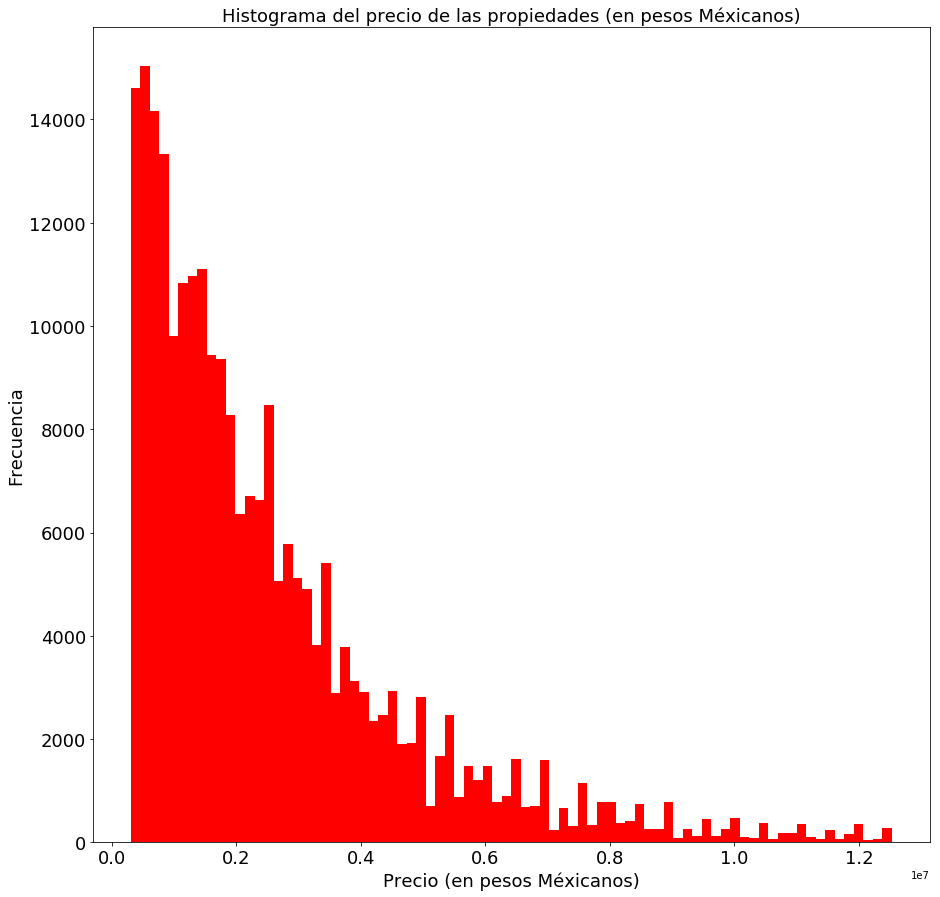

In [158]:
precios=dataframe['precio']
precios
hist(datos=precios,color='red',titulo='Histograma del precio de las propiedades (en pesos Méxicanos)',etiqueta_x='Precio (en pesos Méxicanos)',etiqueta_y='Frecuencia')

Del análisis del gráfico se puede observar que: 
* La mayoría de las propiedades valen menos de 5000000, pero hay valores de algunas propiedades que pueden llegar a valer 12000000
* El gráfico presenta una cola larga hacia la derecha

## Análisis de los atributos de Localización

### Análisis del atributo provincia

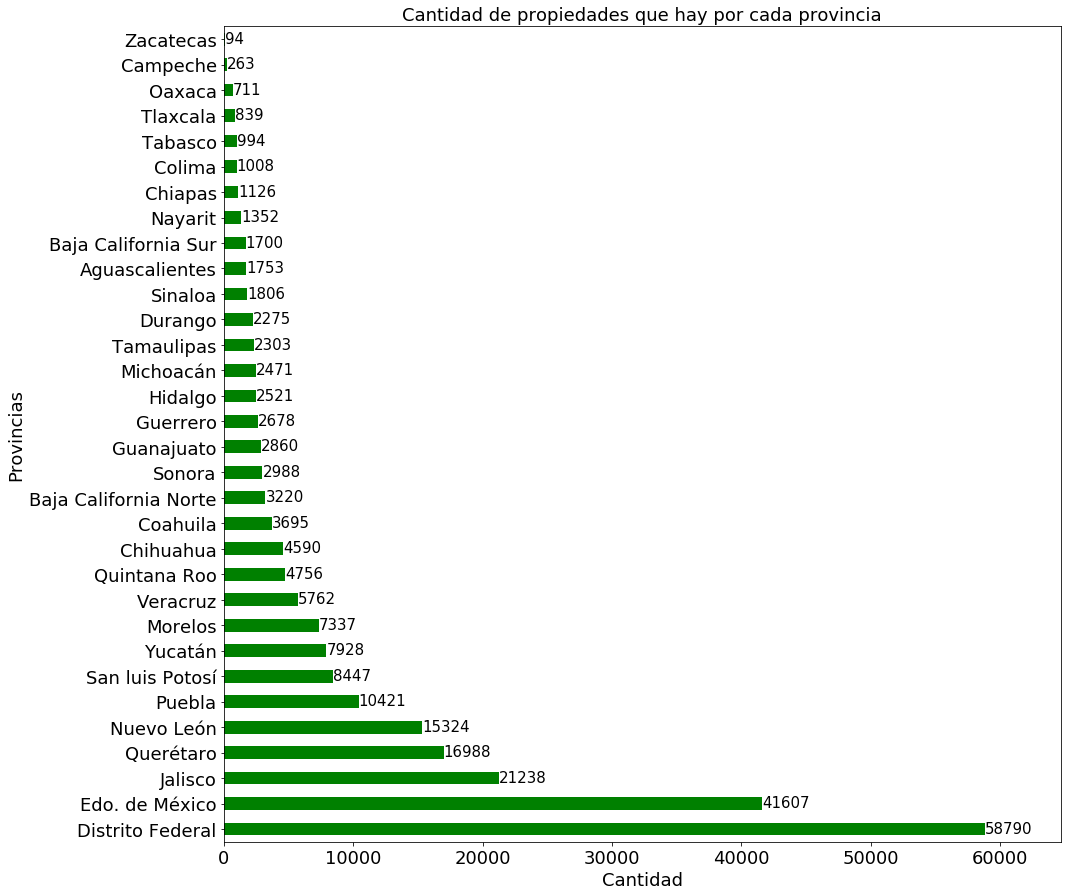

In [146]:
canprovincias=dataframe['provincia'].value_counts()
hbarplot(datos=canprovincias,color='green',titulo='Cantidad de propiedades que hay por cada provincia',etiqueta_x='Cantidad',etiqueta_y='Provincias')

* Del análisis del gráfico se puede observar que la mayor cantidad de propiedades se encuentran en el Distrito Federal (58790 propiedades), seguida de las que se encuentran en el Estado de México(416007). El Distrito Federal es la capital del pais, y el Estado de México limita con el Distrito Federal, siendo estas dos las provincias más pobladas del país. (fuente: https://es.wikipedia.org/wiki/Anexo:Entidades_federativas_de_M%C3%A9xico_por_superficie,_poblaci%C3%B3n_y_densidad)

*  Luego la tercer provincia con más propiedades es Jalisco, pero los valores comienzan a caer a cifras mucho más pequeñas (Jalisco posee 21238 propiedades)

* Luego le siguen en orden decreciente: Querétato ,Nuevo León, Puebla, San Luis Potosí,Yucatán

* La provincia con menos propiedades es Zacatecas, que solo posee 94 propiedades

### Análisis del atributo direccion

In [147]:
#pongo todo el texto en mayúscula, cuento frecuencia de aparición de cada direccion y transformo la serie obtenida en un diccionario
direcciones=dataframe['direccion'].str.upper().value_counts().to_dict()
direcciones

{'-': 660,
 '.': 476,
 'CALLE': 354,
 '1': 212,
 'JURIQUILLA': 183,
 'DOMICILIO CONOCIDO': 175,
 'CENTRO': 168,
 'EL REFUGIO': 161,
 'NORTE DE MÉRIDA': 137,
 'CUMBRES DEL LAGO': 135,
 'X': 131,
 'X #X': 123,
 'LOMAS DE ANGELOPOLIS': 115,
 '0': 113,
 'BENITO JUAREZ': 109,
 'SIN NOMBRE': 102,
 'HIDALGO': 101,
 'CANCUN': 100,
 'EMILIANO ZAPATA': 100,
 'JESUS DEL MONTE': 99,
 'METEPEC': 98,
 'CALLE 18 NO.344 X 11 Y 13 COL. CAMARA DE COMERCIO NORTE': 97,
 'EL MIRADOR': 93,
 'BOSQUE REAL': 92,
 'CONDESA': 89,
 'CUMBRES': 88,
 'HACIENDA DEL CIERVO': 88,
 'SANTA FE': 87,
 'CUAUHTEMOC': 84,
 'MORELOS': 80,
 'S/N': 80,
 'INDEPENDENCIA': 79,
 'REFORMA': 78,
 'DESIERTO DE LOS LEONES': 74,
 'JACARANDAS': 72,
 'REAL DE JURIQUILLA': 70,
 'LOMAS VERDES': 70,
 '...': 70,
 'MIGUEL HIDALGO': 70,
 'MILENIO III': 69,
 'NORTE': 69,
 'POLANCO': 69,
 'LOMAS DE JURIQUILLA': 68,
 'AMORES': 67,
 'CHIHUAHUA, CHIH, MÉXICO': 67,
 'GABRIEL MANCERA': 66,
 '16 DE SEPTIEMBRE': 64,
 '--': 64,
 'SAN FRANCISCO': 64,
 'SAN

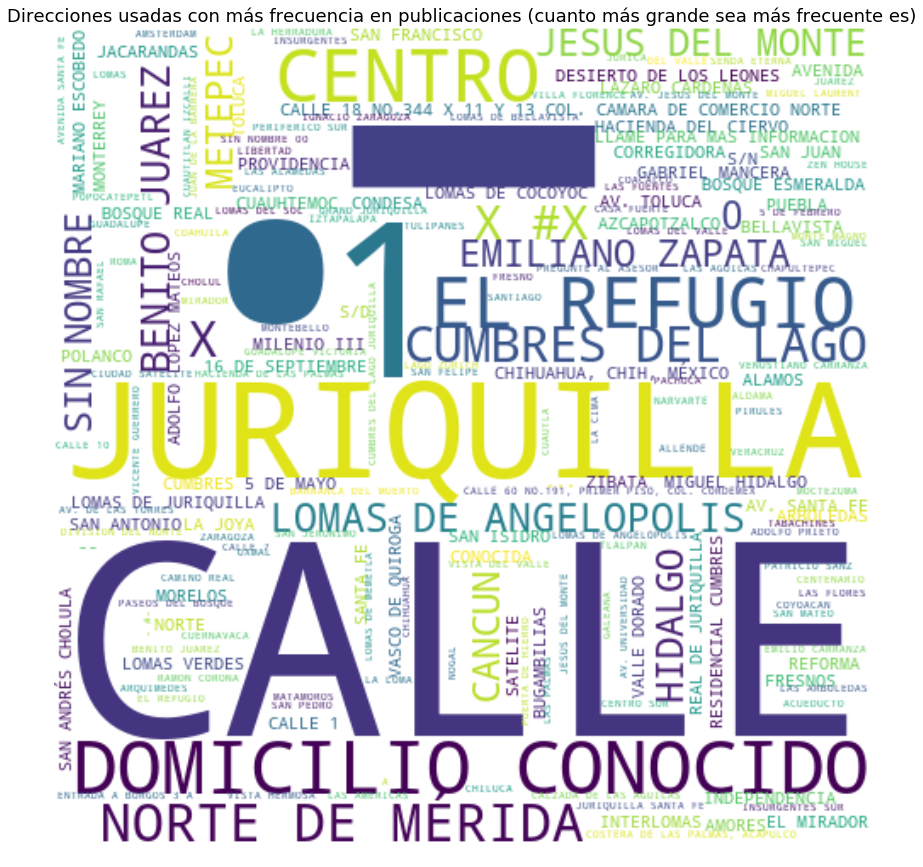

In [148]:
wordcloud(frecuencias=direcciones,titulo='Direcciones usadas con más frecuencia en publicaciones (cuanto más grande sea más frecuente es)')

* En muchas publicaciones aparecen direcciones que no parecen aportar información. 
Se observa que las direcciones más frecuentes son: "-", ".", "Calle","1", "Domicilio conocido", "Centro"
    
* Dentro de las publicaciones cuya dirección parece brindar un poco más de información, se pueden observar las siguientes direcciones: "Juriquilla", "El refugio", "Norte de Mérida","Cumbres del lago" Sin embargo la frecuencia de estas direcciones es menor a las que no aportan prácticamente información.

### Análisis del atributo ciudad

In [149]:
#pongo todo el texto en mayúscula, cuento frecuencia de aparición de cada ciudad y transformo la serie obtenida en un diccionario
ciudades=dataframe['ciudad'].value_counts().to_dict()
ciudades

{'Querétaro': 12646,
 'Benito Juárez': 11014,
 'Zapopan': 10360,
 'San Luis Potosí': 7925,
 'Mérida': 7162,
 'Monterrey': 6946,
 'Alvaro Obregón': 6633,
 'Cuauhtémoc': 6614,
 'Naucalpan de Juárez': 6554,
 'Miguel Hidalgo': 5795,
 'Atizapán de Zaragoza': 5783,
 'Tlalpan': 5721,
 'Huixquilucan': 5718,
 'Coyoacán': 5293,
 'Puebla': 4636,
 'Guadalajara': 4006,
 'San Andrés Cholula': 3805,
 'Cancún': 3779,
 'Cuernavaca': 3775,
 'Chihuahua': 3757,
 'Tlalnepantla de Baz': 3588,
 'Cuautitlán Izcalli': 3408,
 'Tlajomulco de Zúñiga': 3254,
 'Gustavo A. Madero': 3141,
 'Iztapalapa': 3093,
 'Cuajimalpa de Morelos': 3020,
 'Tijuana': 2863,
 'Hermosillo': 2590,
 'Acapulco de Juárez': 2454,
 'Ecatepec de Morelos': 2159,
 'Durango': 2048,
 'Toluca': 2026,
 'Corregidora': 2018,
 'Metepec': 1996,
 'Azcapotzalco': 1972,
 'La Magdalena Contreras': 1905,
 'Morelia': 1887,
 'Guadalupe': 1865,
 'Saltillo': 1845,
 'San Pedro Garza García': 1470,
 'Venustiano Carranza': 1457,
 'Aguascalientes': 1452,
 'Torreón

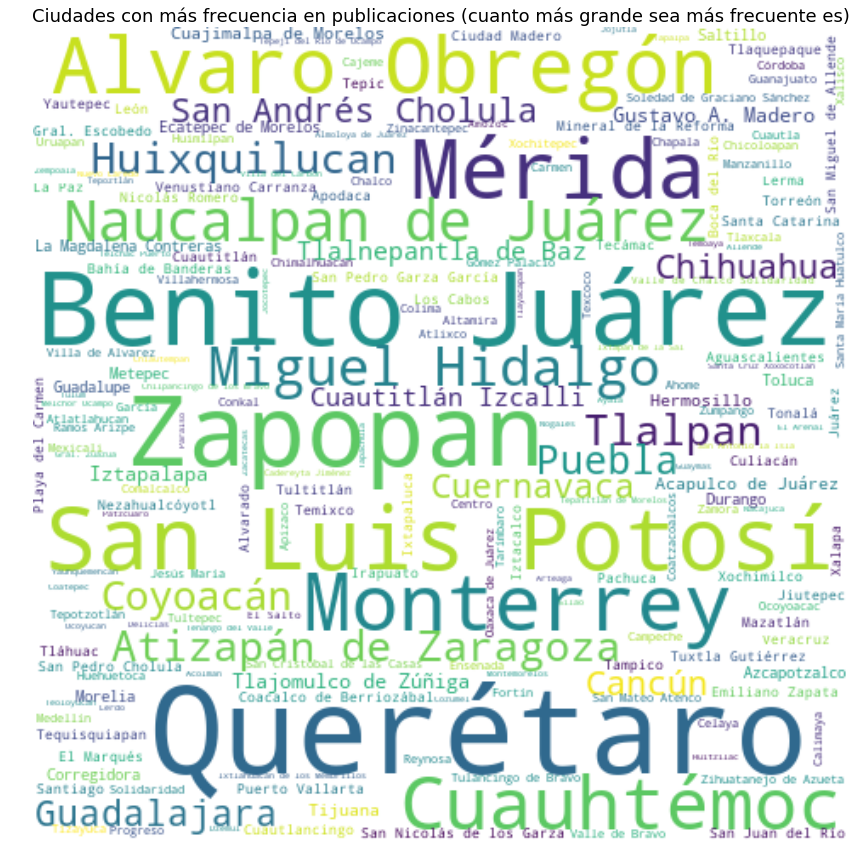

In [150]:
wordcloud(frecuencias=ciudades,titulo='Ciudades con más frecuencia en publicaciones (cuanto más grande sea más frecuente es)')

* Se observa que las ciudades con más publicaciones en orden descendente son: Querétaro, Benito Juárez,Zapopan,San Luis Potosí,Mérida,Monterrey,Alvaro Obregón,Cuauhtémoc. Si llegasen a existir muchas ciudades con el mismo nombre dispersas por distintas provincias de México podría parecer que hay muchas publicaciones de una misma ciudad cuando en realidad esto no ocurre.

A continuación voy a analizar si hay varias ciudades de las nombradas anteriormente que tienen igual nombre pero están dentro de provincias diferentes:

In [151]:
ciudadesporprovincia=dataframe[dataframe['ciudad'].isin(['Querétaro', 'Benito Juárez','Zapopan','San Luis Potosí','Mérida','Monterrey','Alvaro Obregón','Cuauhtémoc'])]
ciudadesporprovincia['cantidad']=1
ciudadesporprovincia=ciudadesporprovincia.groupby(['ciudad','provincia']).agg({'cantidad': 'sum'}).sort_values('cantidad', ascending=False)
ciudadesporprovincia

C:\Users\licha\Miniconda3\envs\orgadatos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cantidad
ciudad          provincia                 
Querétaro       Querétaro            12646
Benito Juárez   Distrito Federal     11013
Zapopan         Jalisco              10360
San Luis Potosí San luis Potosí       7925
Mérida          Yucatán               7162
Monterrey       Nuevo León            6946
Alvaro Obregón  Distrito Federal      6632
Cuauhtémoc      Distrito Federal      6539
                Chihuahua               58
                Colima                  17
Alvaro Obregón  Michoacán                1
Benito Juárez   Tlaxcala                 1

In [152]:
#total=10360+7925+7162+6946+6632+6539+58+17+1+1

In [153]:
ciudadesporprovincia['log_cantidad'] = np.log(ciudadesporprovincia['cantidad'])
ciudadesporprovincia

cantidad  log_cantidad
ciudad          provincia                               
Querétaro       Querétaro            12646      9.445096
Benito Juárez   Distrito Federal     11013      9.306832
Zapopan         Jalisco              10360      9.245708
San Luis Potosí San luis Potosí       7925      8.977778
Mérida          Yucatán               7162      8.876545
Monterrey       Nuevo León            6946      8.845921
Alvaro Obregón  Distrito Federal      6632      8.799662
Cuauhtémoc      Distrito Federal      6539      8.785540
                Chihuahua               58      4.060443
                Colima                  17      2.833213
Alvaro Obregón  Michoacán                1      0.000000
Benito Juárez   Tlaxcala                 1      0.000000

In [154]:
dato=ciudadesporprovincia.pivot_table(index='ciudad',columns='provincia',values='log_cantidad')
dato

provincia,Chihuahua,Colima,Distrito Federal,Jalisco,Michoacán,Nuevo León,Querétaro,San luis Potosí,Tlaxcala,Yucatán
ciudad,,,,,,,,,,
Alvaro Obregón,NaN,NaN,8.799662,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Benito Juárez,NaN,NaN,9.306832,NaN,NaN,NaN,NaN,NaN,0.0,NaN
Cuauhtémoc,4.060443,2.833213,8.785540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monterrey,NaN,NaN,NaN,NaN,NaN,8.845921,NaN,NaN,NaN,NaN
Mérida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.876545
Querétaro,NaN,NaN,NaN,NaN,NaN,NaN,9.445096,NaN,NaN,NaN
San Luis Potosí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.977778,NaN,NaN
Zapopan,NaN,NaN,NaN,9.245708,NaN,NaN,NaN,NaN,NaN,NaN


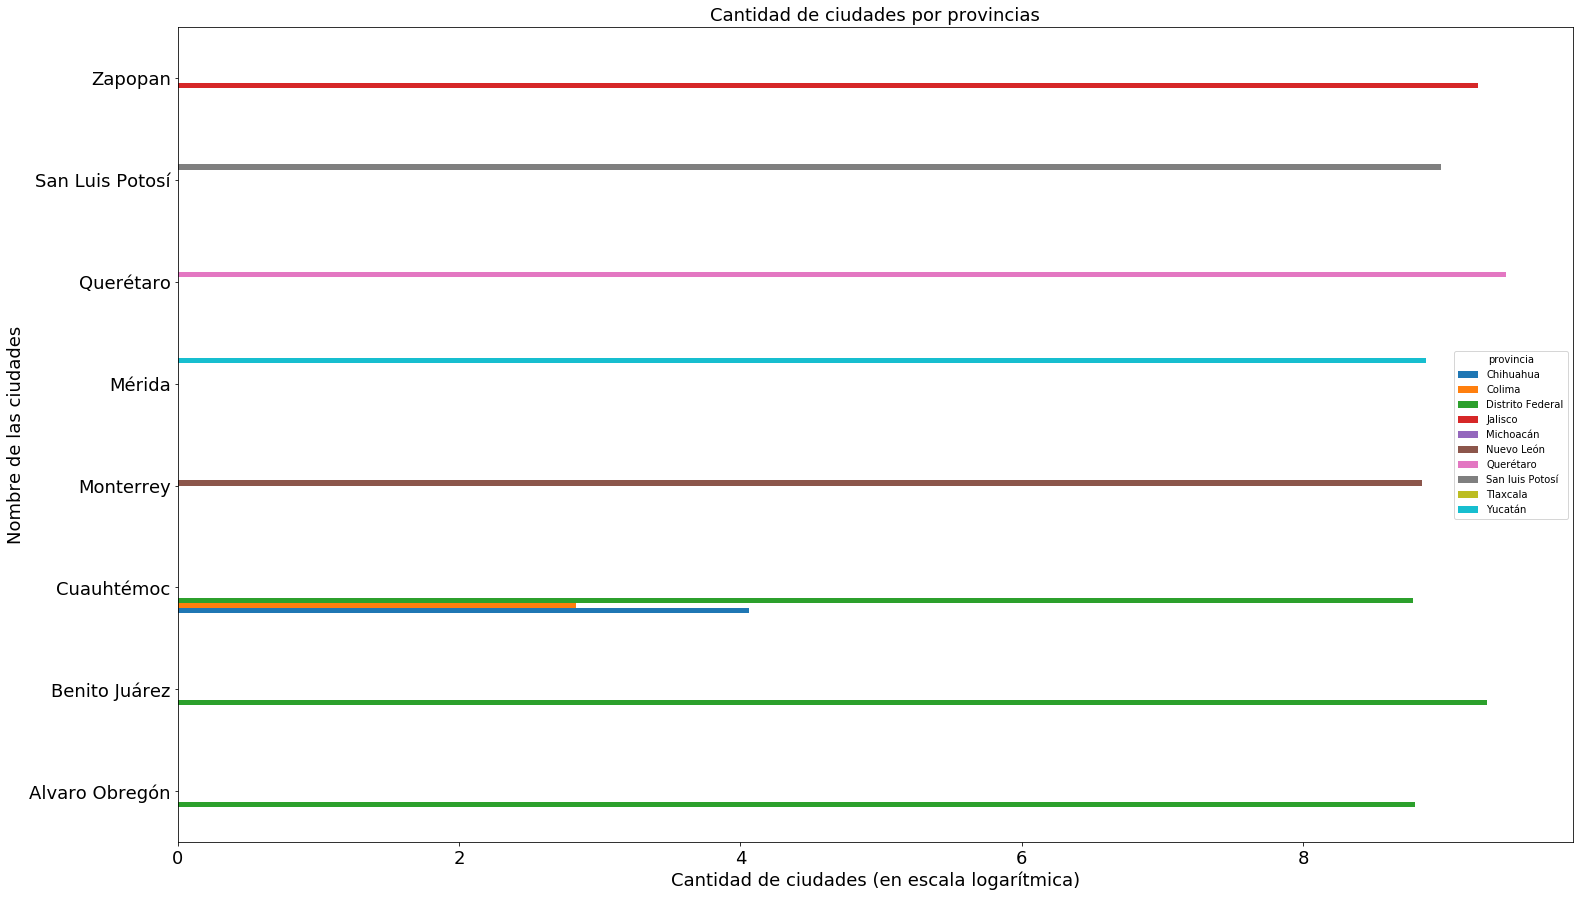

In [161]:
hbarplotdf(datos=dato,titulo='Cantidad de ciudades por provincias',etiqueta_x='Cantidad de ciudades (en escala logarítmica)',etiqueta_y='Nombre de las ciudades',tamanio=(25,15))


* Hay varias ciudades llamadas Cuauhtémoc en distintas provincias de México. 
Sin embargo la alta frecuencia de estas ciudades no viene dada porque haya muchas ciudades con el mismo nombre dispersas por todo el pais sino porque la mayoría de estás ciudades son las que corresponden al Distrito Federal (la cual es una provincia con muchas publicaciones)
* Además recordando al análisis de la cantidad de propiedades publicadas por provincia, las demás provincias que aparecen en este gráfico (Jalisco,Querétato ,Nuevo León, San Luis Potosí,Yucatán) también estan entre las que tienen más publicaciones